# Linear Regression Workflow: Medical Insurance Cost
This notebook demonstrates a complete linear regression workflow using the provided medical insurance cost dataset.

## 1. Import Libraries and Configure Notebook
Import all necessary libraries for data analysis, visualization, and modeling.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configure notebook for better visuals
%matplotlib inline
sns.set(style="whitegrid")

## 2. Load CSV Data
Read the CSV file with pandas and display the first few rows to confirm successful import.

In [2]:
# Load the dataset
df = pd.read_csv('medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Inspect Dataset Structure and Data Types
Check the shape, columns, data types, summary statistics, and null-value counts.

In [3]:
# Dataset structure and types
print('Shape:', df.shape)
print('Columns:', df.columns.tolist())
df.info()
df.describe()
print('\nNull values per column:')
print(df.isnull().sum())

Shape: (1338, 7)
Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB

Null values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## 4. Clean Missing Values and Duplicates
Handle missing values and remove duplicates, then recheck data integrity.

In [4]:
# Handle missing values (drop rows with any missing values)
df_clean = df.dropna()
# Remove duplicates
df_clean = df_clean.drop_duplicates()
# Recheck data integrity
print('Shape after cleaning:', df_clean.shape)
print('Null values after cleaning:')
print(df_clean.isnull().sum())

Shape after cleaning: (1337, 7)
Null values after cleaning:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## 5. Select Features and Target Variable
Define the input features (X) and target variable (y). Apply encoding or scaling if needed.

In [5]:
# Example: Assume 'charges' is the target, and all other columns are features
# Encode categorical variables if present
X = pd.get_dummies(df_clean.drop('charges', axis=1), drop_first=True)
y = df_clean['charges']

print('Features:', X.columns.tolist())
print('Target:', y.name)

Features: ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
Target: charges


## 6. Split Data into Training and Test Sets
Split the data into training and test sets for model evaluation.

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (1069, 8)
Test shape: (268, 8)


## 7. Train a Linear Regression Model
Fit a linear regression model using the training data.

In [7]:
# Train linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## 8. Evaluate Model Performance
Generate predictions and compute MAE, MSE, RMSE, and $R^2$ metrics.

In [8]:
# Predict and evaluate
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

MAE: 4177.05
MSE: 35478020.68
RMSE: 5956.34
R^2: 0.81


## 9. Visualize Predictions vs Actual Values
Create scatter and residual plots to compare predicted and true values.

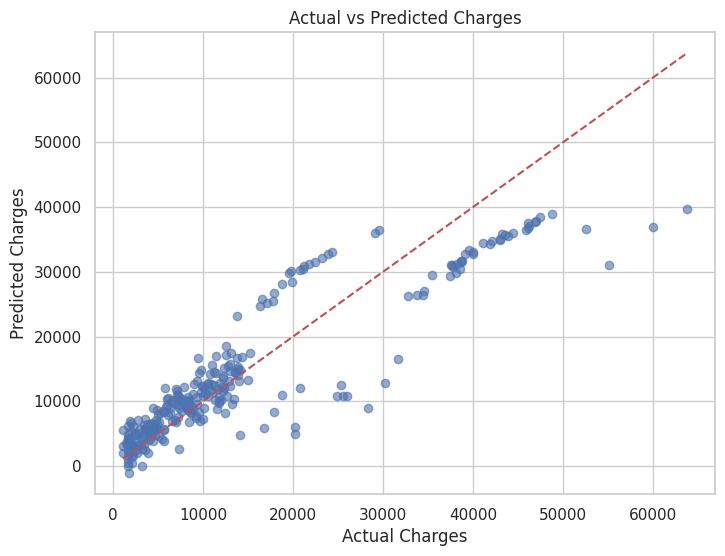

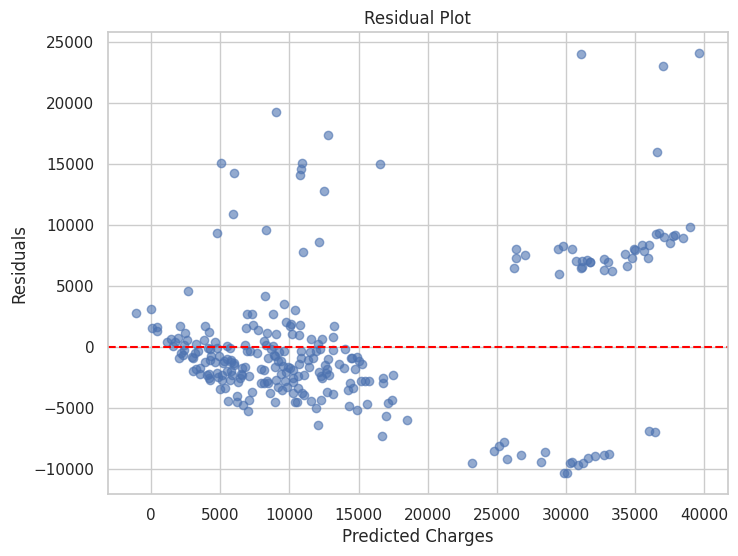

In [9]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## 10. Interpret Coefficients and Residuals
Extract model intercept and coefficients, map them to feature names, and inspect residuals for diagnostics.

Intercept: -11092.65229594595


,Feature,Coefficient
0,age,248.210720
1,bmi,318.701441
2,children,533.009989
3,sex_male,-101.542054
4,smoker_yes,23077.764593
5,region_northwest,-391.761455
6,region_southeast,-838.919616
7,region_southwest,-659.139752


Residuals mean: 425.25699484326077
Residuals std: 5952.258086556658


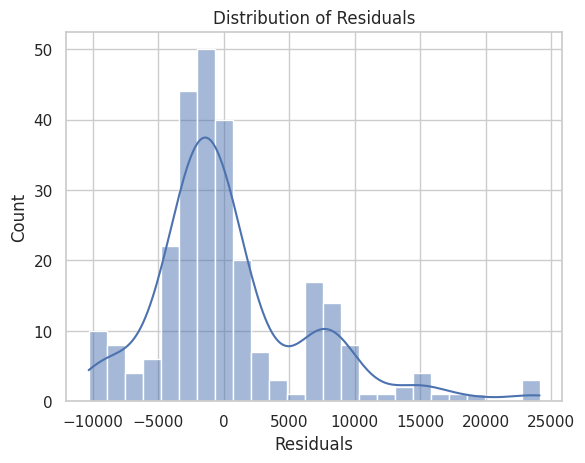

In [10]:
# Model intercept and coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})
print('Intercept:', lr.intercept_)
display(coef_df)

# Residuals summary
print('Residuals mean:', residuals.mean())
print('Residuals std:', residuals.std())
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()